## 简单的了解Pandas

Pandas被成为Python语言的R语言。

Pandas的运行速度非常的快，包含了high-level data structures。

功能性包括了：
1. Series/TimeSeries：1D labelled vector
2. DataFrame：2D spreadsheet-life structure
3. Panel：3D labeled array, collection of DataFrames

Pands的缩写为：panel + data + structures。

## 索引

每一个轴都有一个索引

不同索引对象之间会进行自动对齐

分层的索引提供了一种结构化和直观的方式来使用更高维度的数据。

## Pandas的数据结构

Pandas提供了两种数据结构：

1. Series
2. DataFrame

这两种数据结构都是建立在NumPy之上的，所以他们的速度非常的快。

In [ ]:
# 通常来讲，我们是这样导入Pandas的
import pandas as pd

## 了解Series

一个Series是一个一维变量（one-dimensional）对象，近似于一个array，list或者table中的一个column。

**注意**：Series是mutable structure。

In [2]:
obj = pd.Series([-1, -2, -3, -4, -5])

In [3]:
obj

0   -1
1   -2
2   -3
3   -4
4   -5
dtype: int64

可以发现obj这个Series中的每一个元素都被自动的分配了一个index label，从0开始。

In [5]:
obj.index  # 我们使用index来查看Series对象的index情况

RangeIndex(start=0, stop=5, step=1)

In [8]:
obj.values  # 我们可以查看Series的具体的值

array([-1, -2, -3, -4, -5], dtype=int64)

我们来尝试一下指定obj2的序列：

In [9]:
obj2 = pd.Series([1, 2, 3, 4, 5], index = ['a', 'b', 'c', 'd', 'e'])

In [10]:
obj2

a    1
b    2
c    3
d    4
e    5
dtype: int64

接着我们来使用index对series中的元素进行选取：

In [11]:
obj2['a']

1

In [12]:
obj2['d']

4

In [13]:
obj2['e'] = 100

In [14]:
obj2

a      1
b      2
c      3
d      4
e    100
dtype: int64

In [15]:
'b' in obj2

True

In [16]:
'f' in obj2

False

**我们接着来尝试将dict转换到Series**

In [17]:
sdata = {'Ohio': 35000, 'Texas': 71000,  'Oregon': 16000, 'Utah': 5000}

In [18]:
obj3 = pd.Series(sdata)

In [20]:
obj3

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

In [21]:
obj3.index

Index(['Ohio', 'Texas', 'Oregon', 'Utah'], dtype='object')

In [22]:
obj3.values

array([35000, 71000, 16000,  5000], dtype=int64)

或者我们可以这么做：

In [24]:
obj4 = pd.Series({"a":1, "b":2, "c":3})

In [25]:
obj4

a    1
b    2
c    3
dtype: int64

**我们可以试着对不同index的Series进行操作**

In [26]:
s_1 = pd.Series({'a':1, 'b':2, 'c':3, 'd':4})

In [27]:
s_1

a    1
b    2
c    3
d    4
dtype: int64

In [28]:
s_2 = pd.Series({'c':4, 'd':5, 'e':6, 'f':7})

In [29]:
s_2

c    4
d    5
e    6
f    7
dtype: int64

In [30]:
s_1 + s_2

a    NaN
b    NaN
c    7.0
d    9.0
e    NaN
f    NaN
dtype: float64

In [31]:
s_1 - s_2

a    NaN
b    NaN
c   -1.0
d   -1.0
e    NaN
f    NaN
dtype: float64

可以发现pandas会自动对两个series中index对应的数据进行操作，如果没有对应的index，那么结果会被显示为NaN。

## 了解DataFrame

Pandas的DataFrame从设计上与R语言的DataFrame结构相似。

DataFrame有着row和column两个index。

DataFrame可以接收的数据如下所示：

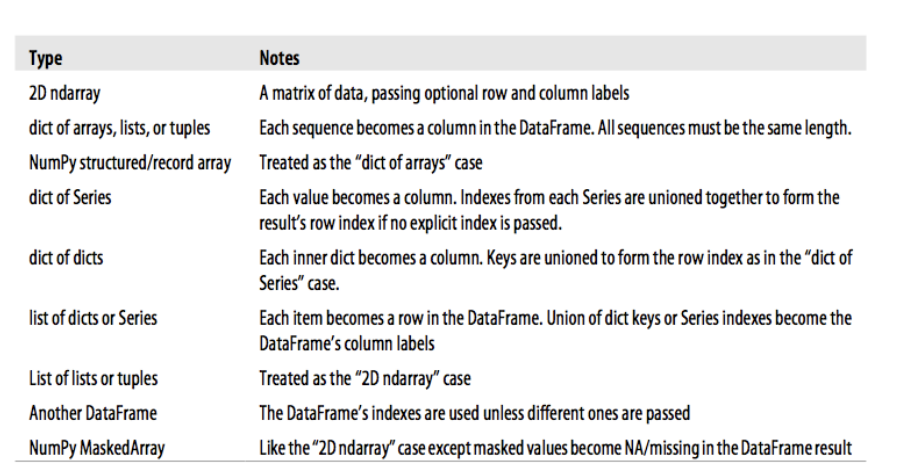

In [32]:
data = {'state':['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada'],
       'year': [2000, 2001, 2002, 2001, 2002],
       'pop': [1.5, 1.7, 3.6, 2.4, 2.9]}

In [33]:
data

{'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada'],
 'year': [2000, 2001, 2002, 2001, 2002],
 'pop': [1.5, 1.7, 3.6, 2.4, 2.9]}

In [34]:
frame = pd.DataFrame(data)

In [35]:
frame

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9


In [40]:
frame2 = pd.DataFrame(data,columns=['year','state','pop','debt'],
                      index=['one', 'two', 'three', 'four', 'five'])

In [41]:
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN


我们可以按照名字来调取column：

In [47]:
frame2['state']

one        Ohio
two        Ohio
three      Ohio
four     Nevada
five     Nevada
Name: state, dtype: object

或者我们也可以这么做：

In [48]:
frame2.year

one      2000
two      2001
three    2002
four     2001
five     2002
Name: year, dtype: int64

如果我们想要调取的是rows，那么我们可以使用positionm,name：

In [51]:
frame2.loc['three']

year     2002
state    Ohio
pop       3.6
debt      NaN
Name: three, dtype: object

In [58]:
frame2.loc['one', :]  # 我们先给出行的名称，然后使用 : 来获取这一行的所有的内容

year     2000
state    Ohio
pop       1.5
debt      NaN
Name: one, dtype: object

In [62]:
import numpy as np

In [63]:
frame2['debt'] = np.arange(5.)

In [64]:
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,0.0
two,2001,Ohio,1.7,1.0
three,2002,Ohio,3.6,2.0
four,2001,Nevada,2.4,3.0
five,2002,Nevada,2.9,4.0


我们可以去掉DataFrame中的某一行

In [65]:
obj = pd.Series(np.arange(5.), index=['a', 'b', 'c', 'd', 'e'])

In [66]:
obj

a    0.0
b    1.0
c    2.0
d    3.0
e    4.0
dtype: float64

In [67]:
obj_2 = obj.drop('e')

In [68]:
obj_2

a    0.0
b    1.0
c    2.0
d    3.0
dtype: float64

In [70]:
data = pd.DataFrame(np.arange(16).reshape((4, 4)), index=['Ohio', 'Colorado', 'Utah', 'New York'], columns=['one', 'two', 'three', 'four'])

In [71]:
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [73]:
data.drop(['Colorado', 'Utah'])  # 我们可以向drop中传递一个列表来drop多行

,one,two,three,four
Ohio,0,1,2,3
New York,12,13,14,15


In [74]:
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [75]:
data.drop(['two', 'four'], axis = 1)

,one,three
Ohio,0,2
Colorado,4,6
Utah,8,10
New York,12,14


我们可以creating nested dicts：

In [76]:
pop = {'Nevada': {2001: 2.4, 2002: 2.9}, 'Ohio': {2000: 1.5, 2001: 1.7, 2002: 3.6}}

In [77]:
frame3 = pd.DataFrame(pop)

In [78]:
frame3

,Nevada,Ohio
2001,2.4,1.7
2002,2.9,3.6
2000,NaN,1.5


接着我们来进行转置：

In [79]:
frame3.T

,2001,2002,2000
Nevada,2.4,2.9,NaN
Ohio,1.7,3.6,1.5


In [80]:
frame3.index.name = 'year'

In [81]:
frame3

,Nevada,Ohio
year,,
2001,2.4,1.7
2002,2.9,3.6
2000,NaN,1.5


**我们来尝试对data frames进行merging**

大体的操作如下所示：

- left:'use'only'keys'from'left'frame'(SQL:'left'outer'join)
- right:'use'only'keys'from'right'frame'(SQL:'right'outer'join)
- outer:'use'union'of'keys'from'both'frames'(SQL:'full'outer'join)
- inner:'use'intersection'of'keys'from'both'frames'(SQL:'inner'join)


In [83]:
left_frame = pd.DataFrame({'key': range(5), 'left_value': ['a', 'b', 'c', 'd', 'e']}) 

In [84]:
right_frame = pd.DataFrame({'key': range(2, 7), 'right_value': ['f', 'g', 'h', 'i', 'j']}) 

In [85]:
left_frame

,key,left_value
0,0,a
1,1,b
2,2,c
3,3,d
4,4,e


In [86]:
right_frame

,key,right_value
0,2,f
1,3,g
2,4,h
3,5,i
4,6,j


In [89]:
pd.merge(left_frame, right_frame, on='key', how='inner')  # 只有两个DataFrame的index能够对应的上

,key,left_value,right_value
0,2,c,f
1,3,d,g
2,4,e,h


In [90]:
pd.merge(left_frame, right_frame, on='key', how='left')  # 按照左边的dataframe来

,key,left_value,right_value
0,0,a,NaN
1,1,b,NaN
2,2,c,f
3,3,d,g
4,4,e,h


In [94]:
pd.merge(left_frame, right_frame, on='key', how='right')  # 按照右边的dataframe来

,key,left_value,right_value
0,2,c,f
1,3,d,g
2,4,e,h
3,5,NaN,i
4,6,NaN,j


In [95]:
pd.merge(left_frame, right_frame, on='key', how='outer')   # 整个

,key,left_value,right_value
0,0,a,NaN
1,1,b,NaN
2,2,c,f
3,3,d,g
4,4,e,h
5,5,NaN,i
6,6,NaN,j


In [93]:
pd.concat([left_frame, right_frame])

,key,left_value,right_value
0,0,a,NaN
1,1,b,NaN
2,2,c,NaN
3,3,d,NaN
4,4,e,NaN
0,2,NaN,f
1,3,NaN,g
2,4,NaN,h
3,5,NaN,i
4,6,NaN,j


In [96]:
pd.concat([left_frame, right_frame], axis=1)

,key,left_value,key,right_value
0,0,a,2,f
1,1,b,3,g
2,2,c,4,h
3,3,d,5,i
4,4,e,6,j


**我们来尝试一下groupby**

In [99]:
import pandas as pd  # 我们首先import pandas

In [100]:
matcars = pd.read_csv('mtcars.csv')  # 然后我们使用read_csv来读取 mtcars.csv 数据

In [102]:
matcars.head()   # 查看一下头5条

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [103]:
matcars.tail()  #　查看一下最后５条

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
27,Lotus Europa,30.4,4,95.1,113,3.77,1.513,16.9,1,1,5,2
28,Ford Pantera L,15.8,8,351.0,264,4.22,3.170,14.5,0,1,5,4
29,Ferrari Dino,19.7,6,145.0,175,3.62,2.770,15.5,0,1,5,6
30,Maserati Bora,15.0,8,301.0,335,3.54,3.570,14.6,0,1,5,8
31,Volvo 142E,21.4,4,121.0,109,4.11,2.780,18.6,1,1,4,2


In [105]:
matcars.shape  # 查看一下整个数据的形状

(32, 12)

In [110]:
matcars.describe()  # 使用describe来查看一下matcars

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [111]:
matcars.mean()   # 查看一下平均值

C:\Users\yinia\AppData\Local\Temp\ipykernel_18160\750739537.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  matcars.mean()   # 查看一下平均值


mpg      20.090625
cyl       6.187500
disp    230.721875
hp      146.687500
drat      3.596563
wt        3.217250
qsec     17.848750
vs        0.437500
am        0.406250
gear      3.687500
carb      2.812500
dtype: float64

In [113]:
matcars.median()  # 查看一下中位数

C:\Users\yinia\AppData\Local\Temp\ipykernel_18160\3624395624.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  matcars.median()  # 查看一下中位数


mpg      19.200
cyl       6.000
disp    196.300
hp      123.000
drat      3.695
wt        3.325
qsec     17.710
vs        0.000
am        0.000
gear      4.000
carb      2.000
dtype: float64

In [114]:
matcars.max()  # 查看一下最大值

model    Volvo 142E
mpg            33.9
cyl               8
disp          472.0
hp              335
drat           4.93
wt            5.424
qsec           22.9
vs                1
am                1
gear              5
carb              8
dtype: object

In [115]:
matcars.min()  # 查看一下最小值

model    AMC Javelin
mpg             10.4
cyl                4
disp            71.1
hp                52
drat            2.76
wt             1.513
qsec            14.5
vs                 0
am                 0
gear               3
carb               1
dtype: object

In [117]:
matcars.quantile()  # 查看一下IQR数据

mpg      19.200
cyl       6.000
disp    196.300
hp      123.000
drat      3.695
wt        3.325
qsec     17.710
vs        0.000
am        0.000
gear      4.000
carb      2.000
Name: 0.5, dtype: float64

In [119]:
matcars.mean(axis=1)  # compute row means (ie across columns)

C:\Users\yinia\AppData\Local\Temp\ipykernel_18160\1269397886.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  matcars.mean(axis=1)  # compute row means (ie across columns)


0     29.907273
1     29.981364
2     23.598182
3     38.739545
4     53.664545
5     35.049091
6     59.720000
7     24.634545
8     27.233636
9     31.860000
10    31.787273
11    46.430909
12    46.500000
13    46.350000
14    66.232727
15    66.058545
16    65.972273
17    19.440909
18    17.742273
19    18.814091
20    24.888636
21    47.240909
22    46.007727
23    58.752727
24    57.379545
25    18.928636
26    24.779091
27    24.880273
28    60.971818
29    34.508182
30    63.155455
31    26.262727
dtype: float64

In [122]:
matcars[matcars["am"]==0].shape

(19, 12)

In [124]:
matcars[matcars["am"]==0]

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4
10,Merc 280C,17.8,6,167.6,123,3.92,3.440,18.90,1,0,4,4
11,Merc 450SE,16.4,8,275.8,180,3.07,4.070,17.40,0,0,3,3
12,Merc 450SL,17.3,8,275.8,180,3.07,3.730,17.60,0,0,3,3


In [126]:
grouped_by_carb_am = matcars.groupby(["carb","am"]) 

In [128]:
grouped_by_carb_am

In [129]:
import numpy as np 

In [130]:
grouped_by_carb_am.agg([np.mean, np.std])

C:\Users\yinia\AppData\Local\Temp\ipykernel_18160\486855255.py:1: FutureWarning: ['model'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped_by_carb_am.agg([np.mean, np.std])


mpg                 cyl                  disp              \
              mean       std      mean       std        mean         std   
carb am                                                                    
1    0   20.333333  1.934770  5.333333  1.154701  201.033333   72.006273   
     1   29.100000  5.061620  4.000000  0.000000   84.200000   16.282301   
2    0   19.300000  3.738449  6.666667  2.065591  278.250000  109.496260   
     1   27.050000  4.300000  4.000000  0.000000  103.025000   21.840234   
3    0   16.300000  1.053565  8.000000  0.000000  275.800000    0.000000   
4    0   14.300000  3.362539  7.428571  0.975900  345.314286  130.108819   
     1   19.266667  3.002221  6.666667  1.154701  223.666667  110.273901   
6    1   19.700000       NaN  6.000000       NaN  145.000000         NaN   
8    1   15.000000       NaN  8.000000       NaN  301.000000         NaN   

                 hp                 drat                  wt            \
               mean        std      mean       std      mean       std   
carb am                                                                  
1    0   104.000000   6.557439  3.180000  0.477912  3.046667  0.518419   
     1    72.500000  13.674794  4.057500  0.153270  2.072500  0.225703   
2    0   134.500000  45.994565  3.291667  0.429205  3.430000  0.251575   
     1    91.250000  27.861263  4.310000  0.493423  2.012000  0.581039   
3    0   180.000000   0.000000  3.070000  0.000000  3.860000  0.183576   
4    0   198.000000  53.276011  3.420000  0.426771  4.329857  0.955280   
     1   161.333333  88.911941  4.006667  0.184752  2.888333  0.275242   
6    1   175.000000        NaN  3.620000       NaN  2.770000       NaN   
8    1   335.000000        NaN  3.540000       NaN  3.570000       NaN   

              qsec                  vs                gear            
              mean       std      mean       std      mean       std  
carb am                                                               
1    0   19.890000  0.403609  1.000000  0.000000  3.000000  0.000000  
     1   19.220000  0.577177  1.000000  0.000000  4.000000  0.000000  
2    0   18.523333  2.449348  0.333333  0.516398  3.333333  0.516398  
     1   17.680000  1.019935  0.750000  0.500000  4.500000  0.577350  
3    0   17.666667  0.305505  0.000000  0.000000  3.000000  0.000000  
4    0   17.381429  1.288700  0.285714  0.487950  3.285714  0.487950  
     1   15.993333  1.323228  0.000000  0.000000  4.333333  0.577350  
6    1   15.500000       NaN  0.000000       NaN  5.000000       NaN  
8    1   14.600000       NaN  0.000000       NaN  5.000000       NaN

In [131]:
counts = grouped_by_carb_am['carb'].count() 

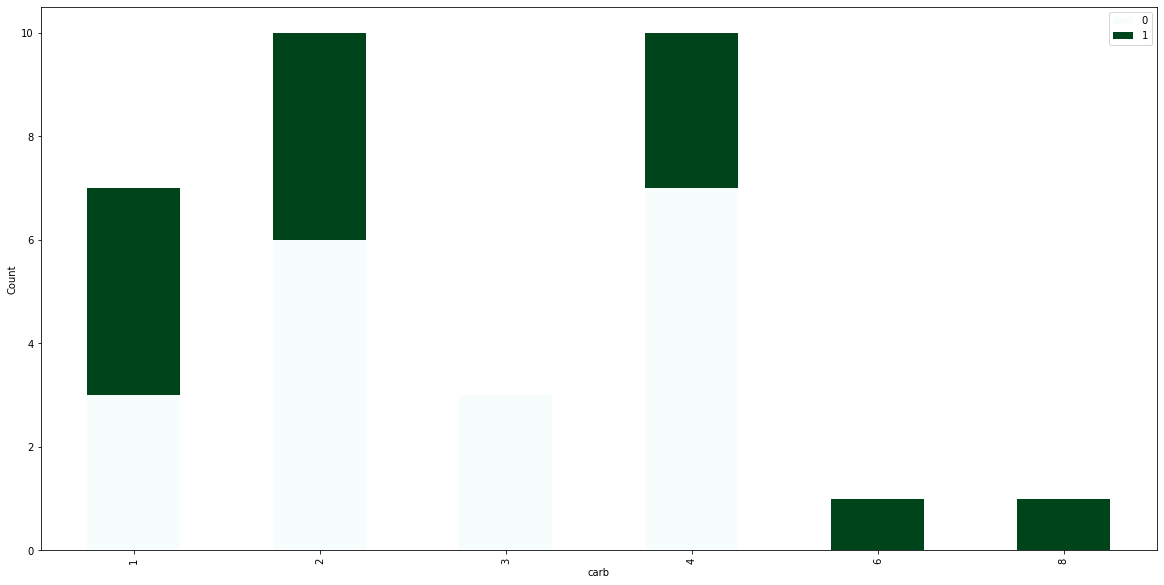

In [132]:
# plot the counts
import matplotlib.pyplot as plt
%matplotlib inline
df = counts.unstack()
ax = df.plot(kind='bar', stacked=True, figsize=(20, 10),
colormap="BuGn")
ax.set_ylabel("Count")
patches, labels = ax.get_legend_handles_labels()
ax.legend(patches, labels, loc='best')

## DataFrame和Series之间的算术

In [133]:
arr = np.arange(12.).reshape((3, 4))  # reshape重塑为3行4列

In [134]:
arr

array([[ 0.,  1.,  2.,  3.],
       [ 4.,  5.,  6.,  7.],
       [ 8.,  9., 10., 11.]])

In [163]:
arr - arr[0]

array([[0., 0., 0., 0.],
       [4., 4., 4., 4.],
       [8., 8., 8., 8.]])

可以发现arr中的每一行都和arr[0]这个数据进行了操作。

## 对索引进行进一步的研究

Index'objects'are'immutable'and'thus'can’t'be'modified'by'the'user:

In [164]:
obj = pd.Series(range(3), index=['a', 'b', 'c'])

In [165]:
obj.index[1] = 'd'

TypeError: Index does not support mutable operations

In [168]:
obj = pd.Series([4.5, 7.2, -5.3, 3.6], index=['d', 'b', 'a', 'c'])

In [170]:
obj_2 = obj.reindex(['a', 'b', 'c', 'd', 'e'])

In [171]:
obj_2

a   -5.3
b    7.2
c    3.6
d    4.5
e    NaN
dtype: float64

In [172]:
obj = pd.Series([4.5, 7.2, -5.3, 3.6], index=['d', 'b', 'a', 'c'])

In [173]:
obj

d    4.5
b    7.2
a   -5.3
c    3.6
dtype: float64

In [175]:
obj.reindex(['a', 'b', 'c', 'd', 'e'], fill_value=0)

a   -5.3
b    7.2
c    3.6
d    4.5
e    0.0
dtype: float64

DataFrame Indexing Options

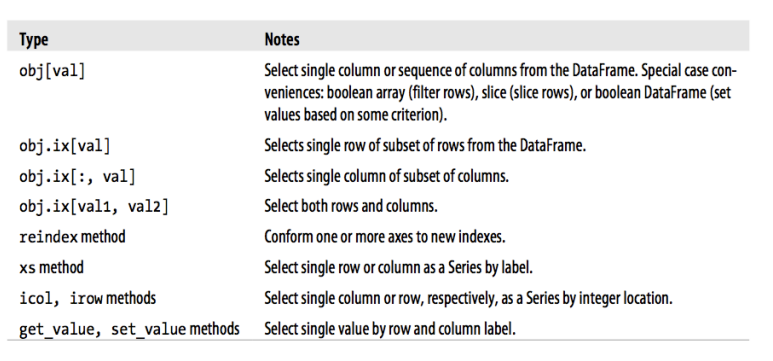

## Descriptive Statistics (pandas)

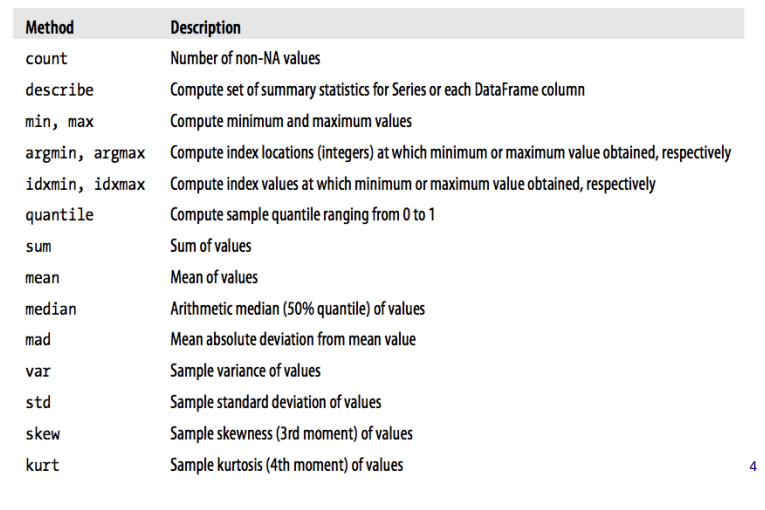

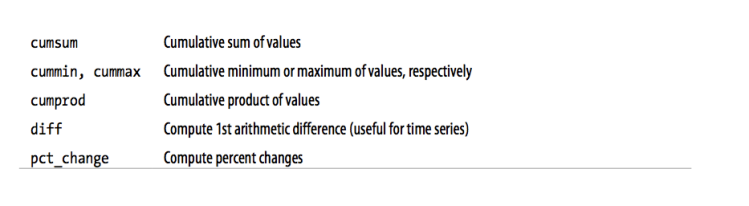

## Missing Data

对于确实的值，我们可以：

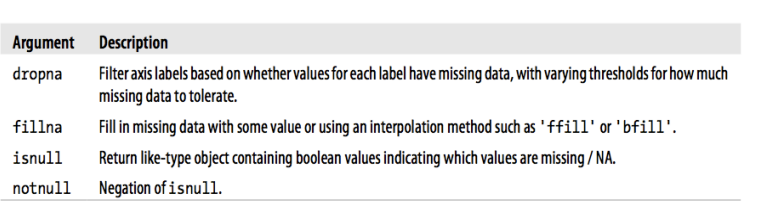

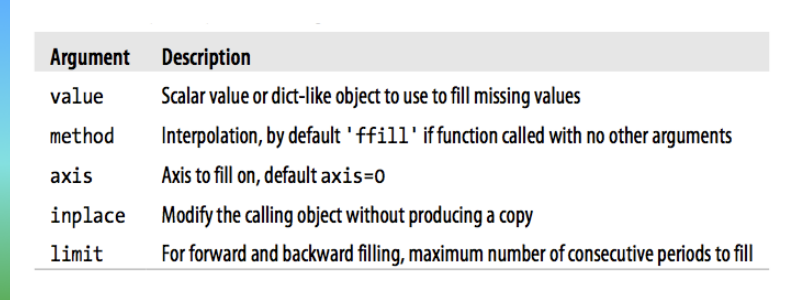